In [1]:
import os
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load results

In [2]:
base_models = ['CNN', 'CNN_ATT', 'CNN_LSTM_ATT', 'CNN_LSTM_TRANS1', 'CNN_LSTM_TRANS2', 'CNN_LSTM_TRANS4',
               'CNN2', 'CNN2_ATT', 'CNN2_LSTM_ATT', 'CNN2_LSTM_TRANS1', 'CNN2_LSTM_TRANS2', 'CNN2_LSTM_TRANS4',
               'CNN_LSTM2', 'CNN_LSTM2_ATT', 'CNN_LSTM2_TRANS1', 'CNN_LSTM2_TRANS2', 'CNN_LSTM2_TRANS4',]
activations = ['relu', 'exponential']
num_trials = 10
results_path = '../results_task2'
keep = 5

results = {}
results_mean = {}
results_std = {}
for model in base_models:
    for activation in activations:
        
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path,model_name +'_stats.pickle')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load saliency analysis stats
                with open(stats_dir, 'rb') as handle:
                    model_auroc = cPickle.load(handle)
                    saliency_roc = cPickle.load(handle)
                    saliency_pr = cPickle.load(handle)
                    snr = cPickle.load(handle)
                    trial_stats.append([model_auroc, np.mean(saliency_roc), np.mean(saliency_pr), np.mean(snr)])

        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        vals =  np.array(trial_stats)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.mean(vals, axis=0)
                    

# Save results to table

In [3]:
fout = open('task2_results_table.tsv', 'w')
fout.write('%s\t%s\t%s\t%s\t%s\n'%('Model', 'AUC', 'AUROC', 'AUPR', 'SNR'))
for key in results_mean:
    fout.write("%s\t%.3f+/-%.3f\t%.3f+/-%.3f\t%.3f+/-%.3f\t%.3f+/-%.3f\n"%(key, 
                                                           results_mean[key][0], results_std[key][0],
                                                           results_mean[key][1], results_std[key][1],
                                                           results_mean[key][2], results_std[key][2],
                                                           results_mean[key][3], results_std[key][3]))
fout.close()

# Generate Figure 2

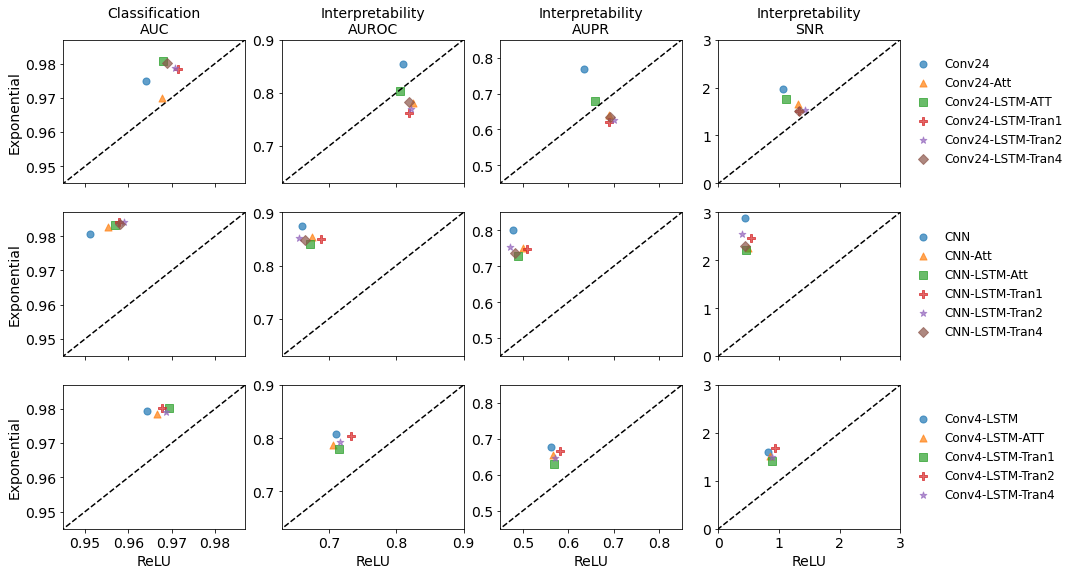

In [4]:
activations = ['relu', 'exponential']
num_trials = 10
marker = 'o^sP*DX'
results_path = '../results_task2'
keep = 5
                 
fig = plt.figure(figsize=(15,9))


base_models = ['CNN', 'CNN_ATT', 'CNN_LSTM_ATT', 'CNN_LSTM_TRANS1', 'CNN_LSTM_TRANS2', 'CNN_LSTM_TRANS4']
legend_names = ['Conv24', 'Conv24-Att', 'Conv24-LSTM-ATT', 'Conv24-LSTM-Tran1', 'Conv24-LSTM-Tran2', 'Conv24-LSTM-Tran4']
results = {}
results_mean = {}
results_std = {}
for model in base_models:
    for activation in activations:
        
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path,model_name +'_stats.pickle')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load saliency analysis stats
                with open(stats_dir, 'rb') as handle:
                    model_auroc = cPickle.load(handle)
                    saliency_roc = cPickle.load(handle)
                    saliency_pr = cPickle.load(handle)
                    snr = cPickle.load(handle)
                    trial_stats.append([model_auroc, np.mean(saliency_roc), np.mean(saliency_pr), np.mean(snr)])

        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        vals =  np.array(trial_stats)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.mean(vals, axis=0)
        
ax = plt.subplot(3,4,1)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.945,.987])
plt.ylim([0.945,.987])
plt.ylabel('Exponential', fontsize=14)
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.95,  0.96, 0.97, .98], fontsize=14)
plt.xticks([0.95,  0.96, 0.97, .98], "",fontsize=14)
plt.title('Classification\nAUC', fontsize=14)

ax = plt.subplot(3,4,2)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.63,.9])
plt.ylim([0.63,.9])
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.7,  0.8, 0.9], fontsize=14)
plt.xticks([0.7,  0.8, 0.9], "",fontsize=14)
plt.title('Interpretability\nAUROC', fontsize=14)


ax = plt.subplot(3,4,3)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.plot([-0.02,1],[-.02,1], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([0.45,.85])
plt.ylim([0.45,.85])
plt.yticks([ 0.5, 0.6, 0.7, 0.8], fontsize=14)
plt.xticks([0.5, 0.6, 0.7, 0.8], "",fontsize=14)
plt.title('Interpretability\nAUPR', fontsize=14)

ax = plt.subplot(3,4,4)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][3], results_mean[base_model+'_exponential'][3], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))
plt.plot([-0.02,3],[-.02,3], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.0,3])
plt.ylim([-0.0,3])
plt.yticks([0., 1, 2, 3], fontsize=14)
plt.xticks([0., 1, 2, 3 ], "",fontsize=14)
plt.title('Interpretability\nSNR', fontsize=14)



base_models = ['CNN2', 'CNN2_ATT', 'CNN2_LSTM_ATT', 'CNN2_LSTM_TRANS1', 'CNN2_LSTM_TRANS2', 'CNN2_LSTM_TRANS4']
legend_names = ['CNN', 'CNN-Att', 'CNN-LSTM-Att', 'CNN-LSTM-Tran1', 'CNN-LSTM-Tran2', 'CNN-LSTM-Tran4']
results = {}
results_mean = {}
results_std = {}
for model in base_models:
    for activation in activations:
        
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path,model_name +'_stats.pickle')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load saliency analysis stats
                with open(stats_dir, 'rb') as handle:
                    model_auroc = cPickle.load(handle)
                    saliency_roc = cPickle.load(handle)
                    saliency_pr = cPickle.load(handle)
                    snr = cPickle.load(handle)
                    trial_stats.append([model_auroc, np.mean(saliency_roc), np.mean(saliency_pr), np.mean(snr)])

        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        vals =  np.array(trial_stats)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.mean(vals, axis=0)
                    
            
ax = plt.subplot(3,4,5)
for i, base_model in enumerate(base_models):    
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.945,.987])
plt.ylim([0.945,.987])
plt.ylabel('Exponential', fontsize=14)
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.95,  0.96, 0.97, .98], fontsize=14)
plt.xticks([0.95,  0.96, 0.97, .98], "",fontsize=14)


ax = plt.subplot(3,4,6)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.63,.9])
plt.ylim([0.63,.9])
#plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.7,  0.8, 0.9], fontsize=14)
plt.xticks([0.7,  0.8, 0.9], "",fontsize=14)

ax = plt.subplot(3,4,7)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.plot([-0.02,1],[-.02,1], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([0.45,.85])
plt.ylim([0.45,.85])
plt.yticks([ 0.5, 0.6, 0.7, 0.8], fontsize=14)
plt.xticks([0.5, 0.6, 0.7, 0.8], "",fontsize=14)

ax = plt.subplot(3,4,8)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][3], results_mean[base_model+'_exponential'][3], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))

plt.plot([-0.02,3],[-.02,3], '--k')
#plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.0,3])
plt.ylim([-0.0,3])
plt.yticks([0., 1, 2, 3], fontsize=14)
plt.xticks([0., 1, 2, 3 ],"", fontsize=14)


base_models = ['CNN_LSTM2', 'CNN_LSTM2_ATT', 'CNN_LSTM2_TRANS1', 'CNN_LSTM2_TRANS2', 'CNN_LSTM2_TRANS4']
legend_names = ['Conv4-LSTM', 'Conv4-LSTM-ATT', 'Conv4-LSTM-Tran1', 'Conv4-LSTM-Tran2', 'Conv4-LSTM-Tran4']
results = {}
results_mean = {}
results_std = {}
for model in base_models:
    for activation in activations:
        
        trial_stats = []
        for trial in range(num_trials):
            model_name = model + '_' + activation + '_' + str(trial)
            stats_dir = os.path.join(results_path,model_name +'_stats.pickle')
            if not os.path.isfile(stats_dir):
                print(model_name)
            else:
                # load saliency analysis stats
                with open(stats_dir, 'rb') as handle:
                    model_auroc = cPickle.load(handle)
                    saliency_roc = cPickle.load(handle)
                    saliency_pr = cPickle.load(handle)
                    snr = cPickle.load(handle)
                    trial_stats.append([model_auroc, np.mean(saliency_roc), np.mean(saliency_pr), np.mean(snr)])

        
        # keep only top classification performing models (this is useful to prune out bad runs from poor initialization)
        vals =  np.array(trial_stats)
        index = np.argsort(vals[:,0])[::-1]
        vals = vals[index[:keep]]
        results[model+'_'+activation] = vals
        results_mean[model+'_'+activation] = np.mean(vals, axis=0)
        results_std[model+'_'+activation] = np.mean(vals, axis=0)
            
ax = plt.subplot(3,4,9)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][0], results_mean[base_model+'_exponential'][0], marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.945,.987])
plt.ylim([0.945,.987])
plt.ylabel('Exponential', fontsize=14)
plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.95,  0.96, 0.97, .98], fontsize=14)
plt.xticks([0.95,  0.96, 0.97, .98], fontsize=14)


ax = plt.subplot(3,4,10)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][1], results_mean[base_model+'_exponential'][1],marker=marker[i], alpha=0.7, s=50)
plt.plot([0,1],[0,1], '--k')
plt.xlim([0.63,.9])
plt.ylim([0.63,.9])
plt.xlabel('ReLU', fontsize=14)
plt.yticks([0.7,  0.8, 0.9], fontsize=14)
plt.xticks([0.7,  0.8, 0.9], fontsize=14)

ax = plt.subplot(3,4,11)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][2], results_mean[base_model+'_exponential'][2], marker=marker[i], alpha=0.7, s=50)
plt.plot([-0.02,1],[-.02,1], '--k')
plt.xlabel('ReLU', fontsize=14)
plt.xlim([0.45,.85])
plt.ylim([0.45,.85])
plt.yticks([ 0.5, 0.6, 0.7, 0.8], fontsize=14)
plt.xticks([0.5, 0.6, 0.7, 0.8], fontsize=14)

ax = plt.subplot(3,4,12)
for i, base_model in enumerate(base_models):
    plt.scatter(results_mean[base_model+'_relu'][3], results_mean[base_model+'_exponential'][3], marker=marker[i], alpha=0.7, s=50)
plt.legend(legend_names, loc='center left', fontsize=12, frameon=False, bbox_to_anchor=(1, 0.5))
plt.plot([-0.02,3],[-.02,3], '--k')
plt.xlabel('ReLU', fontsize=14)
plt.xlim([-0.0,3])
plt.ylim([-0.0,3])
plt.yticks([0., 1, 2, 3], fontsize=14)
plt.xticks([0., 1, 2, 3 ], fontsize=14)

fig.savefig('task2_results.pdf', format='pdf', dpi=200, bbox_inches='tight')
